In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_one_hot=pd.get_dummies(insurance).astype(int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [5]:
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10014.7012 - mae: 10014.7012   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 7575.8721 - mae: 7575.8721
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 7625.0088 - mae: 7625.0088
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 7712.8589 - mae: 7712.8589
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 7295.8823 - mae: 7295.8823
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 7721.0142 - mae: 7721.0142
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 7642.9556 - mae: 7642.9556
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 7316.5430 - mae: 7316.5430
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 7392.7524 - mae: 7392.7524
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 7567.5181 - mae: 7567.5181
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 7593.1724 - mae: 7593.1724
Epoch 12/100
34/34 ━━━━━━━━

In [8]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 7888.1104 - mae: 7888.1104


[7844.85986328125, 7844.85986328125]

In [16]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history=insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [17]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 4996.1851 - mae: 4996.1851


[4850.080078125, 4850.080078125]

Text(0.5, 0, 'epochs')

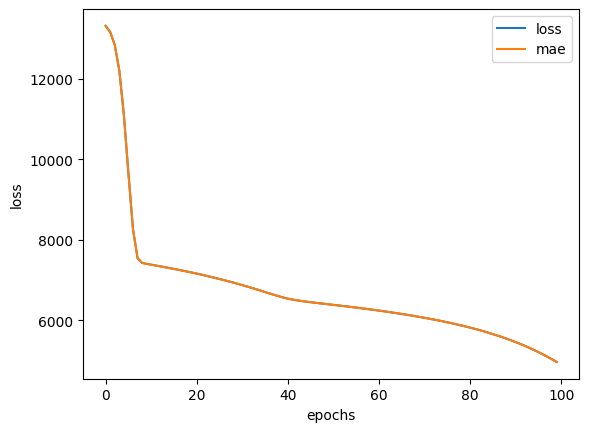

In [18]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [19]:
history2=insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)
loss,mae=insurance_model_2.evaluate(X_test,y_test)
loss,mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 3467.8638 - mae: 3467.8638


(3401.63525390625, 3401.63525390625)

Text(0.5, 0, 'epochs')

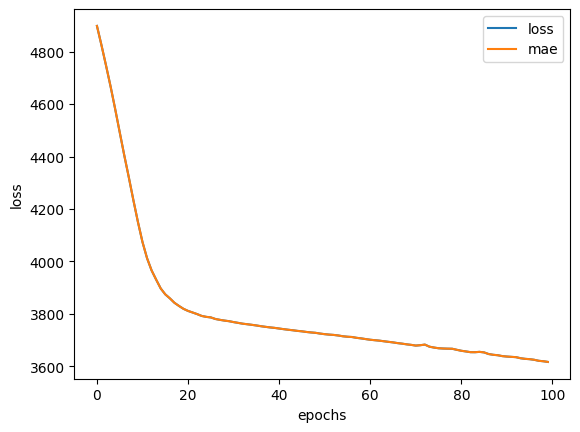

In [20]:
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X=insurance.drop('charges',axis=1)
y=insurance['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [23]:
X_train.loc[0],X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))